In [1]:
import pandas as pd
import numpy as np
%pylab inline

# load oddball metrics
single_metrics = pd.read_csv('./data/binary_metric_dataframes/s2_emp/single_metrics.csv')
spocs_metrics = pd.read_csv('./data/binary_metric_dataframes/s2_emp/spocs_metrics.csv')

# load labels
spocs_labels = pd.read_csv('./data/label_dataframes/spocs_labels.csv')

single_metrics.columns

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Index(['Unnamed: 0', 'apogee_id', 'source_id', 'delta_chisq', 'f_imp',
       'training_density1', 'training_density2', 'q_cannon', 'rv1_cannon',
       'rv2_cannon', 'rvs_spec_sig_to_noise', 'radial_velocity_error',
       'rv_nb_transits', 'single_fit_chisq', 'single_fit_training_density',
       'single_fit_ca_resid'],
      dtype='object')

(array([0.00000000e+00, 9.98188406e-04, 6.82971014e-04, 1.57608696e-04,
        2.62681159e-04, 1.05072464e-04, 1.05072464e-04, 1.05072464e-04,
        1.05072464e-04, 1.57608696e-04, 0.00000000e+00, 0.00000000e+00,
        5.25362319e-05, 5.25362319e-05, 1.05072464e-04, 0.00000000e+00,
        1.57608696e-04, 0.00000000e+00, 1.05072464e-04, 5.25362319e-05,
        1.57608696e-04, 5.25362319e-05, 5.25362319e-05, 0.00000000e+00,
        5.25362319e-05, 0.00000000e+00, 5.25362319e-05, 5.25362319e-05,
        0.00000000e+00]),
 array([   0.        ,  275.86206897,  551.72413793,  827.5862069 ,
        1103.44827586, 1379.31034483, 1655.17241379, 1931.03448276,
        2206.89655172, 2482.75862069, 2758.62068966, 3034.48275862,
        3310.34482759, 3586.20689655, 3862.06896552, 4137.93103448,
        4413.79310345, 4689.65517241, 4965.51724138, 5241.37931034,
        5517.24137931, 5793.10344828, 6068.96551724, 6344.82758621,
        6620.68965517, 6896.55172414, 7172.4137931 , 7448.2758

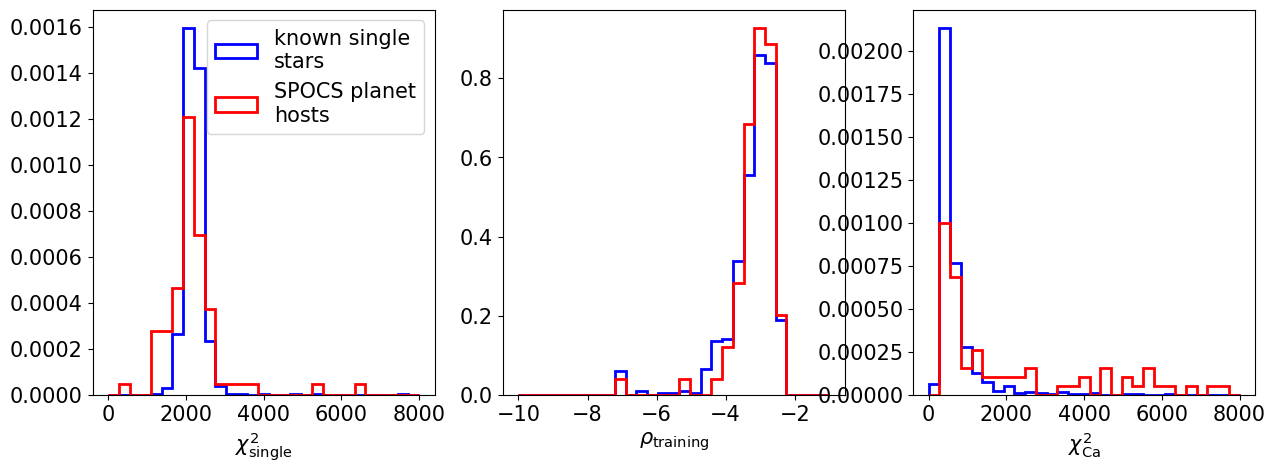

In [2]:
chisq_bins=np.linspace(0,8000,30)
training_density_bins=np.linspace(-10,-1,30)
ca_resid_bins = np.linspace(0,8000,30)

figure(figsize=(15,5))
rcParams['font.size']=15
subplot(131);xlabel(r'$\chi^2_{\rm single}$')
hist(single_metrics.single_fit_chisq, bins=chisq_bins,
    histtype='step', color='b', density=True, lw=2, label='known single\nstars')
hist(spocs_metrics.single_fit_chisq, bins=chisq_bins,
    histtype='step', color='r', density=True, lw=2, label = 'SPOCS planet\nhosts')
legend()


subplot(132);xlabel(r'$\rho_{\rm training}$')
hist(np.log10(single_metrics.single_fit_training_density), bins=training_density_bins,
    histtype='step', color='b', density=True, lw=2)
hist(np.log10(spocs_metrics.single_fit_training_density), bins=training_density_bins,
    histtype='step', color='r', density=True, lw=2)

subplot(133);xlabel(r'$\chi^2_{\rm Ca}$')
hist(single_metrics.single_fit_ca_resid, bins=ca_resid_bins,
    histtype='step', color='b', density=True, lw=2)
hist(spocs_metrics.single_fit_ca_resid, bins=ca_resid_bins,
    histtype='step', color='r', density=True, lw=2)

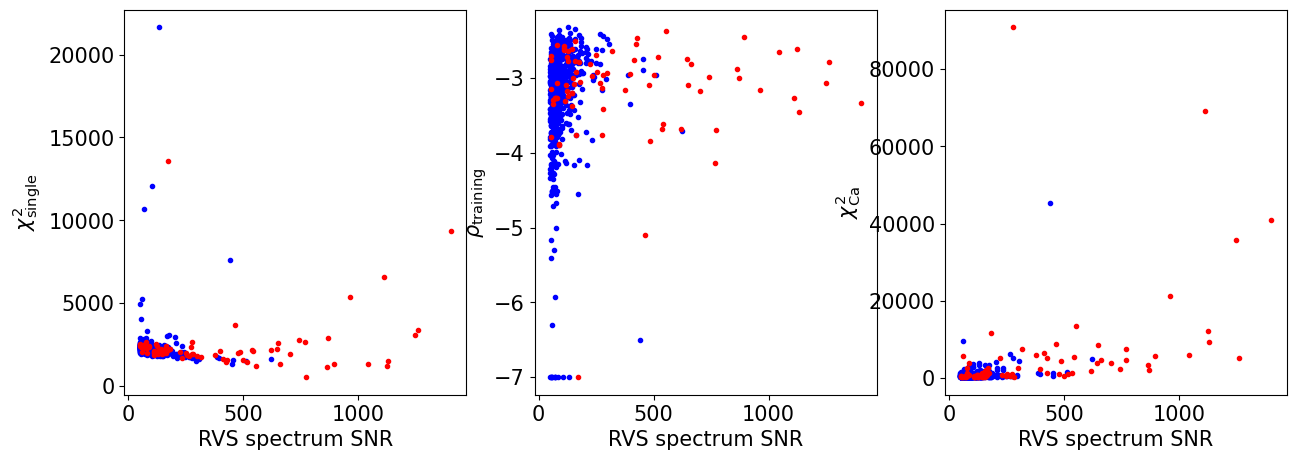

In [3]:
# I'm going to repeat the histograms but versus SNR
figure(figsize=(15,5))
rcParams['font.size']=15
subplot(131);ylabel(r'$\chi^2_{\rm single}$');xlabel('RVS spectrum SNR')
plot(single_metrics.rvs_spec_sig_to_noise, single_metrics.single_fit_chisq, 'b.')
plot(spocs_metrics.rvs_spec_sig_to_noise, spocs_metrics.single_fit_chisq, 'r.')


subplot(132);ylabel(r'$\rho_{\rm training}$');xlabel('RVS spectrum SNR')
plot(single_metrics.rvs_spec_sig_to_noise, 
     np.log10(single_metrics.single_fit_training_density), 'b.')
plot(spocs_metrics.rvs_spec_sig_to_noise, 
     np.log10(spocs_metrics.single_fit_training_density), 'r.')

subplot(133);ylabel(r'$\chi^2_{\rm Ca}$');xlabel('RVS spectrum SNR')
plot(single_metrics.rvs_spec_sig_to_noise, single_metrics.single_fit_ca_resid, 'b.')
plot(spocs_metrics.rvs_spec_sig_to_noise, spocs_metrics.single_fit_ca_resid, 'r.')

Text(0, 0.5, '$\\chi^2_{\\rm single}$')

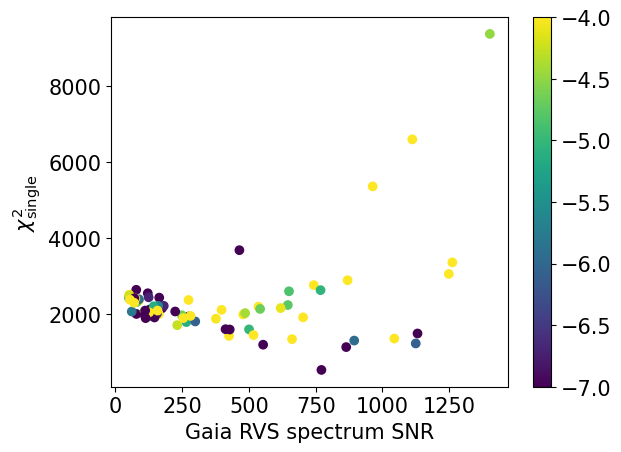

In [4]:
# problem: I'm still observing an increase in the single star chisq for the SPOCS targets
# I verified that the model is using the empirical s2
# and it's much better than before, but I still see a correlation

# this plot shows that there are a lot of low density spocs targets that
# don't have a large single star chi2
# would they get picked up by the training density of the best-fit star?
# they don't seem to...
# this is so concerning and confusing
# maybe it's time for me to go on a walk.


# it also shows that the high SNR stars have large chi2 single 
# even though they have reasonable parameters.
# what is going on with these?


# adding density based on SPOCS-reported labls
import custom_model
density_cols=['Teff','logg','feh','alphafe_gspspec','Vbr'] # these need to be the SPOCS labels

spocs_label_density=[]
for i in range(len(spocs_metrics)):
    metric_row = spocs_metrics.iloc[i]
    label_row = spocs_labels[spocs_labels.target_id==metric_row.target_id].iloc[0]
    density_params = label_row[density_cols].values.tolist()
    if np.isnan(density_params[-2]):
        density=np.nan
    else:
        density=custom_model.training_density(density_params)
    spocs_label_density.append(density)
    
spocs_metrics['spocs_label_density'] = spocs_label_density

#plot(spocs_metrics.rvs_spec_sig_to_noise, spocs_metrics.single_fit_chisq, 'k.')
scatter(spocs_metrics.rvs_spec_sig_to_noise, spocs_metrics.single_fit_chisq,
       c=np.log10(spocs_metrics.spocs_label_density), vmin=-7,vmax=-4)
colorbar()
xlabel('Gaia RVS spectrum SNR');ylabel(r'$\chi^2_{\rm single}$')

In [5]:
# next step: I need to interpret this graph a little more

# Q: does the cannon model behave as it should for the SPOCS sample? 
# A: yes (see one-to-one plots)
# Q: is this sample maybe not a good test case since it's so full of low-density targets?
# A: I think it's fine if our label recovery works 
# Q: should I be concerned about the chi-squared/SNR correlation in the plot above?
# A: I'm not sure. On the one hand it's better than before but on the other hand
# I haven't really even implemented the s2, so I should return to this later.

(array([0.01078205, 0.00780769, 0.00260256, 0.00334615, 0.00148718,
        0.        , 0.        , 0.00074359, 0.        , 0.        ,
        0.        , 0.00074359, 0.        , 0.        , 0.00037179,
        0.        , 0.00074359, 0.00037179, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 array([   0.        ,   34.48275862,   68.96551724,  103.44827586,
         137.93103448,  172.4137931 ,  206.89655172,  241.37931034,
         275.86206897,  310.34482759,  344.82758621,  379.31034483,
         413.79310345,  448.27586207,  482.75862069,  517.24137931,
         551.72413793,  586.20689655,  620.68965517,  655.17241379,
         689.65517241,  724.13793103,  758.62068966,  793.10344828,
         827.5862069 ,  862.06896552,  896.55172414,  931.03448276,
         965.51724138, 1000.        ]),
 [<matplotlib.patches.Polygon at 0x7fbf5d040400>])

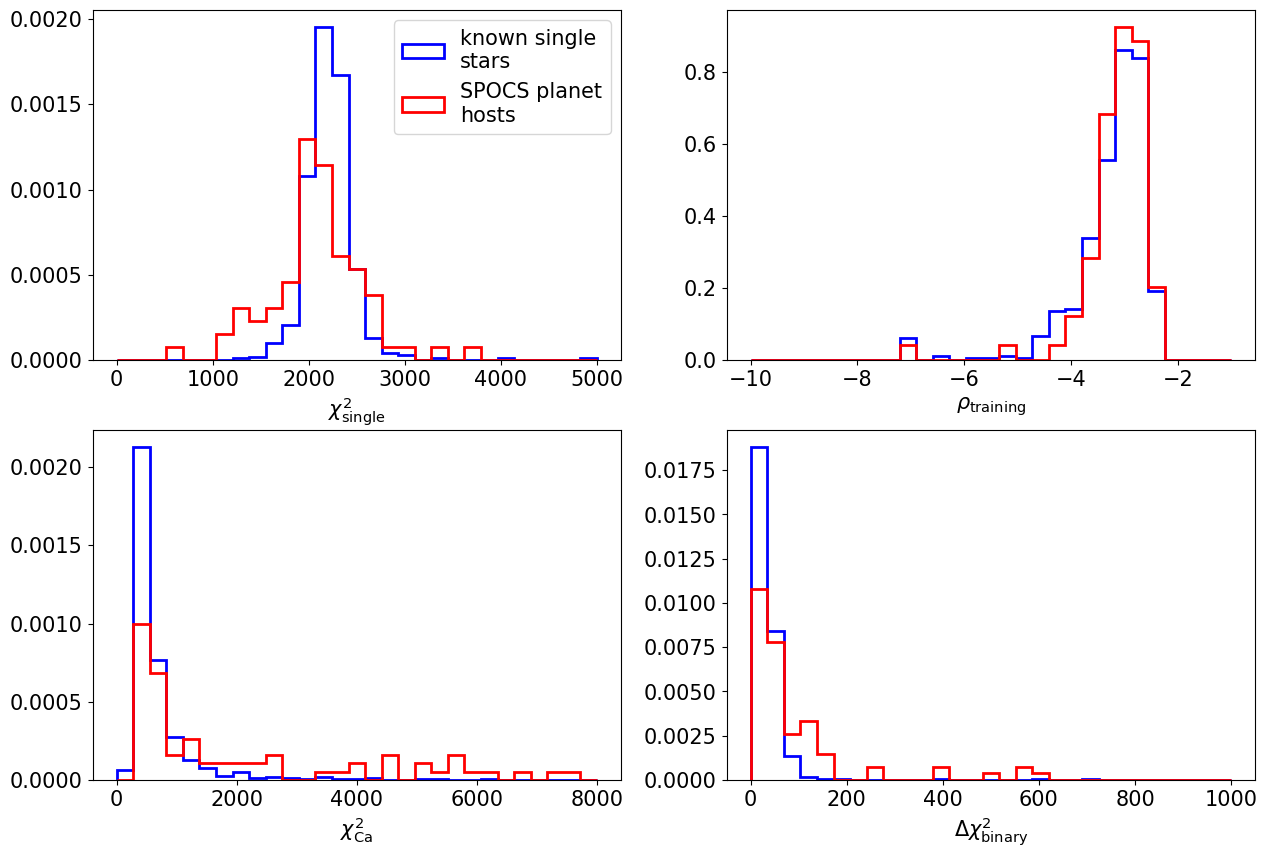

In [7]:
# but quickly...should I look for anomalies in the SPOCS sample?
# based on rho_training, single chi2, chi2_ca and delta_chi2?
delta_chisq_bins=np.linspace(0,1000,30)

figure(figsize=(15,10))
rcParams['font.size']=15
subplot(221);xlabel(r'$\chi^2_{\rm single}$')
hist(single_metrics.single_fit_chisq, bins=chisq_bins,
    histtype='step', color='b', density=True, lw=2, label='known single\nstars')
hist(spocs_metrics.single_fit_chisq, bins=chisq_bins,
    histtype='step', color='r', density=True, lw=2, label = 'SPOCS planet\nhosts')
legend()


subplot(222);xlabel(r'$\rho_{\rm training}$')
hist(np.log10(single_metrics.single_fit_training_density), bins=training_density_bins,
    histtype='step', color='b', density=True, lw=2)
hist(np.log10(spocs_metrics.single_fit_training_density), bins=training_density_bins,
    histtype='step', color='r', density=True, lw=2)

subplot(223);xlabel(r'$\chi^2_{\rm Ca}$')
hist(single_metrics.single_fit_ca_resid, bins=ca_resid_bins,
    histtype='step', color='b', density=True, lw=2)
hist(spocs_metrics.single_fit_ca_resid, bins=ca_resid_bins,
    histtype='step', color='r', density=True, lw=2)

subplot(224);xlabel(r'$\Delta\chi^2_{\rm binary}$')
hist(single_metrics.delta_chisq, bins=delta_chisq_bins,
    histtype='step', color='b', density=True, lw=2)
hist(spocs_metrics.delta_chisq, bins=delta_chisq_bins,
    histtype='step', color='r', density=True, lw=2)

In [8]:
# checking for oddballs in SPOCS
# first I'll see what our code uncovers as binaries, or low training density
# and check if they are reported
# then I should check if our activity metric is correlated with the 
# Recio-Blanco one (it should be)

In [9]:
# let me look at the low training density ones
spocs_metrics.query('single_fit_training_density<1e-6')

# this only returns HD 126614, which is the post-main sequence star I know about!

,Unnamed: 0,target_id,source_id,delta_chisq,f_imp,training_density1,training_density2,q_cannon,rv1_cannon,rv2_cannon,rvs_spec_sig_to_noise,radial_velocity_error,rv_nb_transits,single_fit_chisq,single_fit_training_density,single_fit_ca_resid,spocs_label_density
17,17,HD 126614,3641697998570813952,10349.943967,0.606709,0.000056,0.000039,0.951405,2.708681,-3.630329,170.84755,0.150637,8,13567.306256,1.000002e-07,2609.715911,NaN


In [17]:
# now I'll look at the binaries
spocs_metrics.query('delta_chisq > 300')

# are these binaries?
# I also need to look at their mass ratios and training density of the companion

# HD 216614 : this is the evolved giant with a companion that is too faint to detect,
# it's mostly just evidence that a binary should have a large delta chi2,
# but it shouldn't have a low training density for the best-fit single star
# and it shouldn't have a large binary chi2

# HD 23439 : this has a resolved companion at 6", and the companion is an SB1
# it's also reported to be low metallicity
# we recover the metallicity and while it might look like a companion
# the secondary is very low training density. 
# we also find some activity which is corroborated on jump?


# HD 104304 : 
# reported as post-main sequence
# according to jump, there is a low-mass stellar companion with P=50-100 years
# is it unresovled? it should have a=15au so it shouldn't be resolved right?
# is it bright enough to be detected? it has a mass of 0.2Msun and the primary is solar mass
# so I think it's too faint to be detected and we shouldn't see it
# this is in line with our near-unity mass ratio,
# and the fact that we get a binary might be due to it being post-main sequence?
# especially because the best-fit binary still has a very large chi2
# I also see some activity


# HD 132142 : I don't see much about this star
# maybe it's an undetected binary?
# really hard to say at this point :/

# HD 182572 : apparently this one is a "variable subgiant"?
# so I think what we're finding makes sense...I do see some activity
# the best-fit binary still has a very large chi2 so I wouldn't trust it

# HD 190404: the trianing density of the companion is low

# HD 202917: this is a young star and it's very active, also
# the mass ratio we recover is high

# HD 82885: we recover q=1 so no worries

# question: what is the behavior I see in a [1104304,182572,82885]
# where the model doesn't fit well to the continuum?
# is it because the stars are subgiants?


# *interestingly, the first three stars are all binaries but we shouldn't detect them

# I just want to recover a binary that we know exists....
# maybe I need a different dataset?
# or should I look at the CKS sample?

,Unnamed: 0,target_id,source_id,delta_chisq,f_imp,training_density1,training_density2,q_cannon,rv1_cannon,rv2_cannon,rvs_spec_sig_to_noise,radial_velocity_error,rv_nb_transits,single_fit_chisq,single_fit_training_density,single_fit_ca_resid,spocs_label_density
5,5,HD 23439,231113736385994624,1004.549516,0.264834,0.000074,6.148659e-07,0.768481,-0.779787,1.476315,464.39294,0.122938,27,3676.371904,8.001898e-06,8794.881551,2.345983e-16
15,15,HD 104304,3575733210781078016,558.155915,0.157735,0.000428,1.934857e-04,0.953173,3.310320,-3.713646,1111.55680,0.121801,23,6594.013341,5.341125e-04,69119.820372,2.378907e-04
17,17,HD 126614,3641697998570813952,10349.943967,0.606709,0.000056,3.922890e-05,0.951405,2.708681,-3.630329,170.84755,0.150637,8,13567.306256,1.000002e-07,2609.715911,NaN
18,18,HD 132142,1606148310770764288,412.113774,0.307444,0.000459,1.959909e-06,0.756684,-0.421539,1.803260,618.84490,0.121648,37,2151.868500,2.045169e-04,1928.935299,8.011559e-05
25,25,HD 182572,4315804351350378496,597.797525,0.286691,0.000483,1.906666e-05,0.818119,1.105871,-2.149955,1401.76600,0.118311,29,9370.899568,4.553146e-04,41017.176138,3.257511e-05
27,27,HD 190404,1833199729671740800,577.430772,0.292580,0.000004,1.276977e-07,0.817483,-0.220699,0.143859,768.09370,0.119493,31,2623.792942,7.197720e-05,4636.151158,8.879626e-06
28,28,HD 202917,6463782435948431616,407.320494,0.159935,0.000622,3.141890e-04,0.905857,-4.055508,6.387486,277.95535,0.225201,17,2631.519037,3.882047e-04,90801.716225,NaN
59,59,HD 82885,798068905726303232,505.621562,0.242825,0.000677,5.557775e-04,0.992288,-3.621821,3.709679,963.29930,0.119277,16,5355.592118,6.966790e-04,21298.880057,9.976382e-04


HD 23439


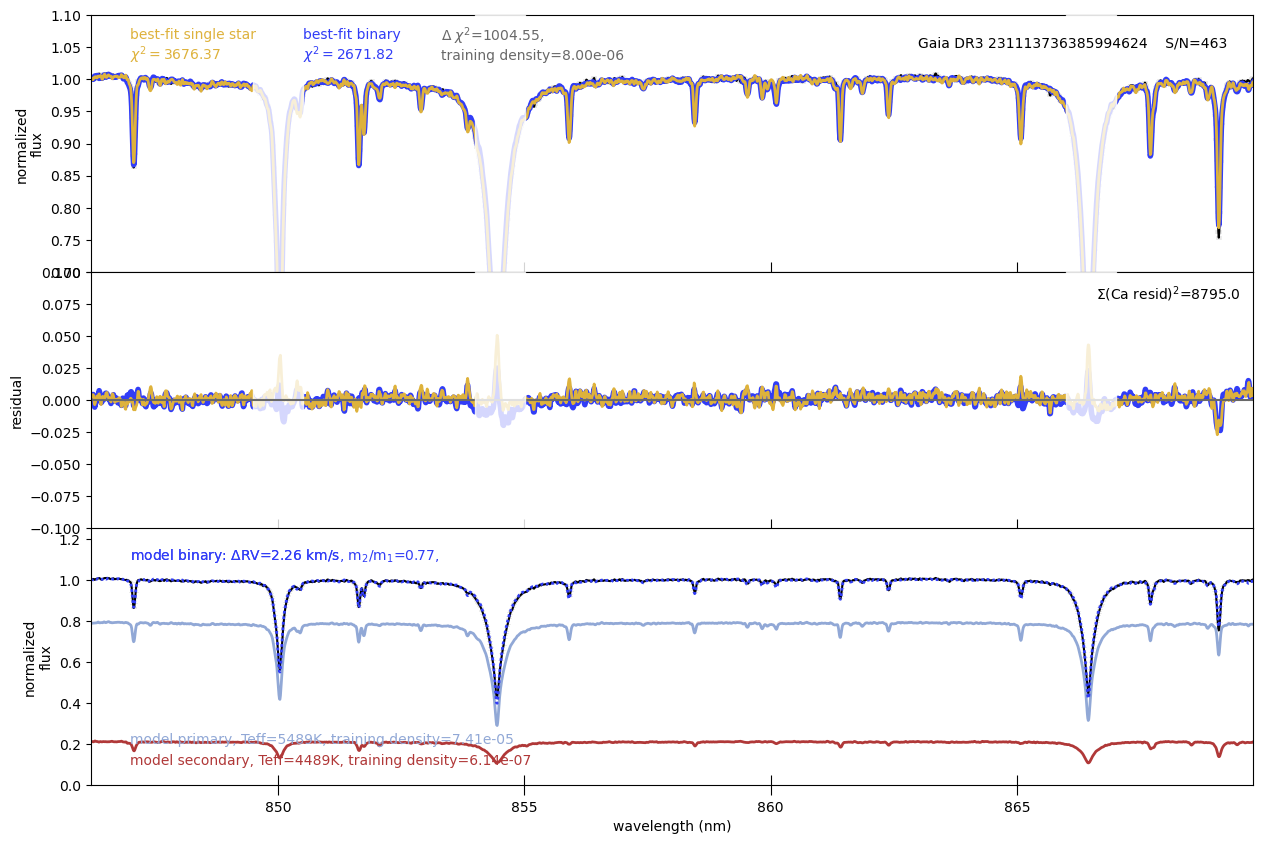

HD 104304


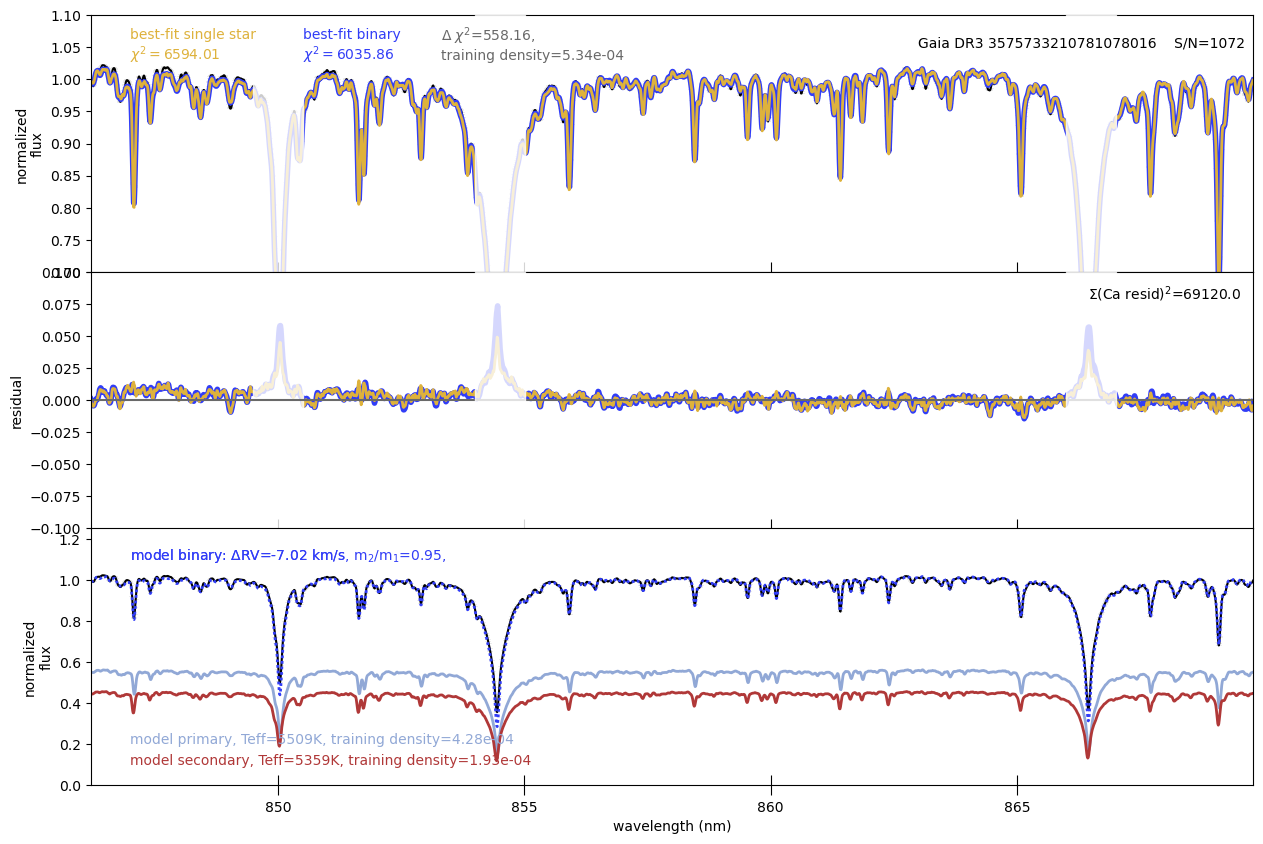

HD 126614


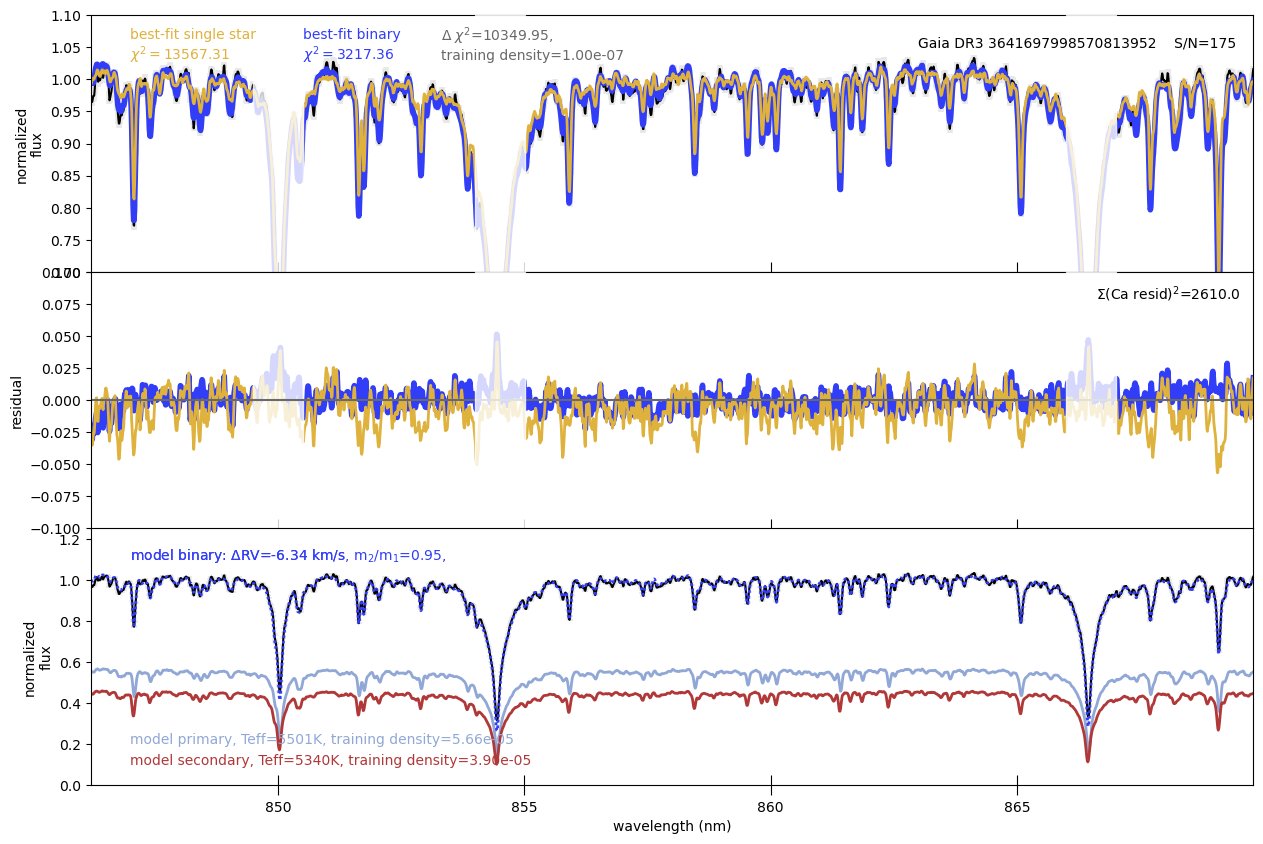

HD 132142


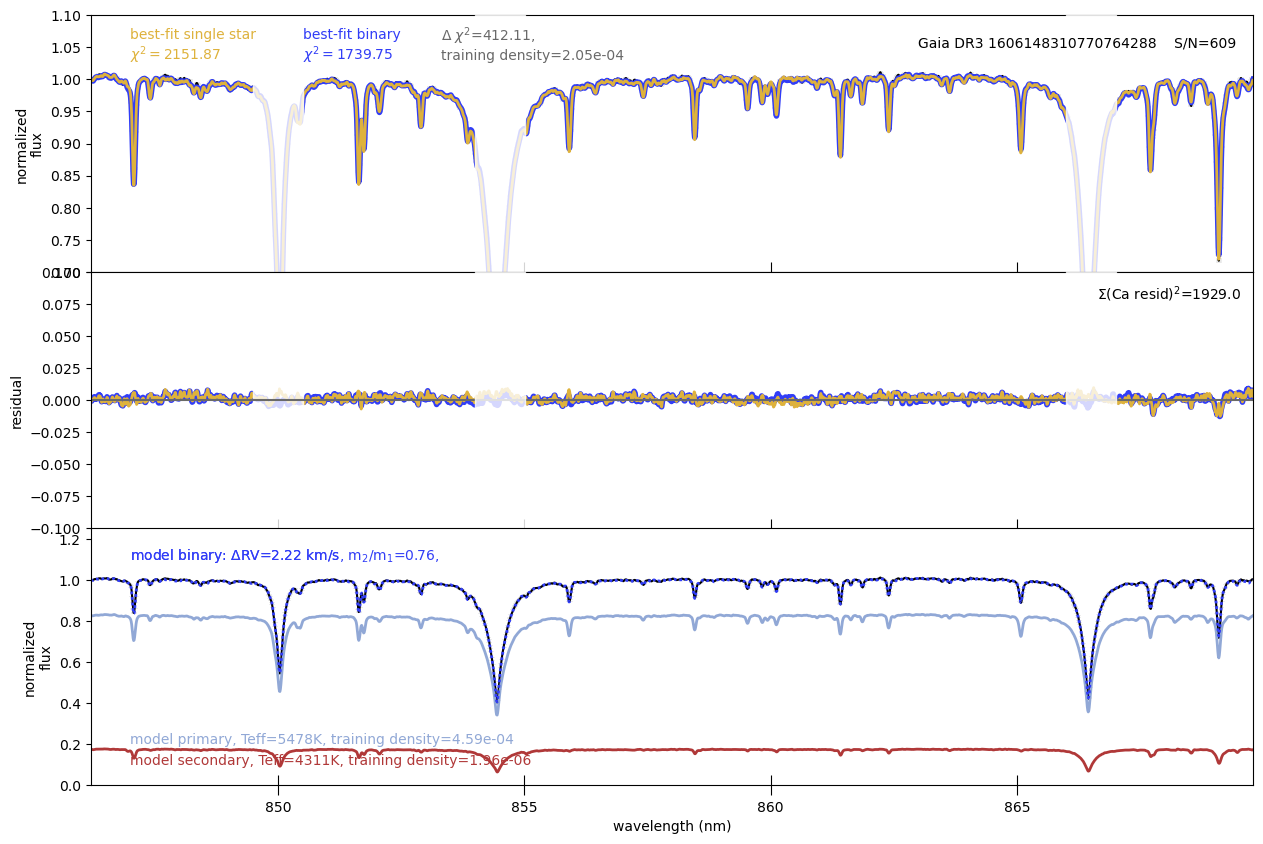

HD 182572


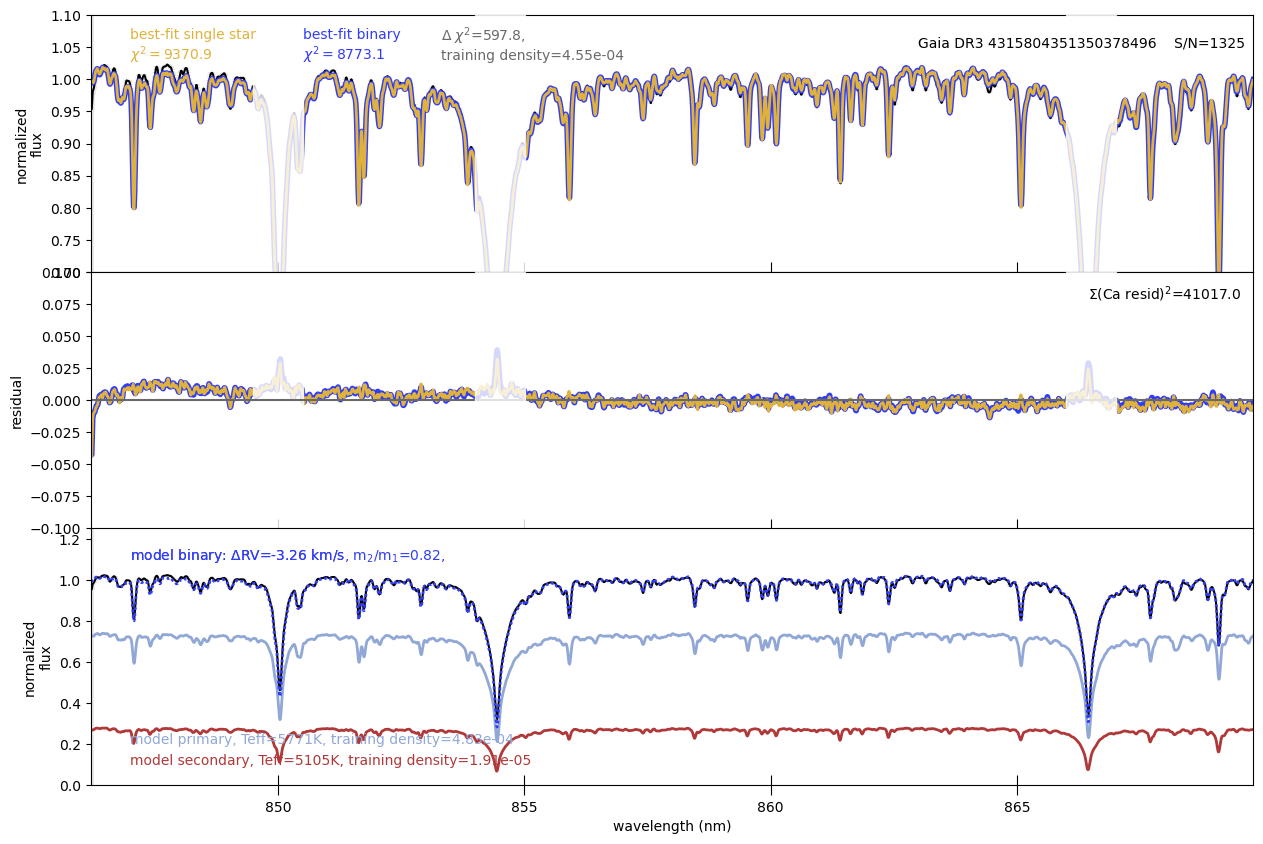

HD 190404


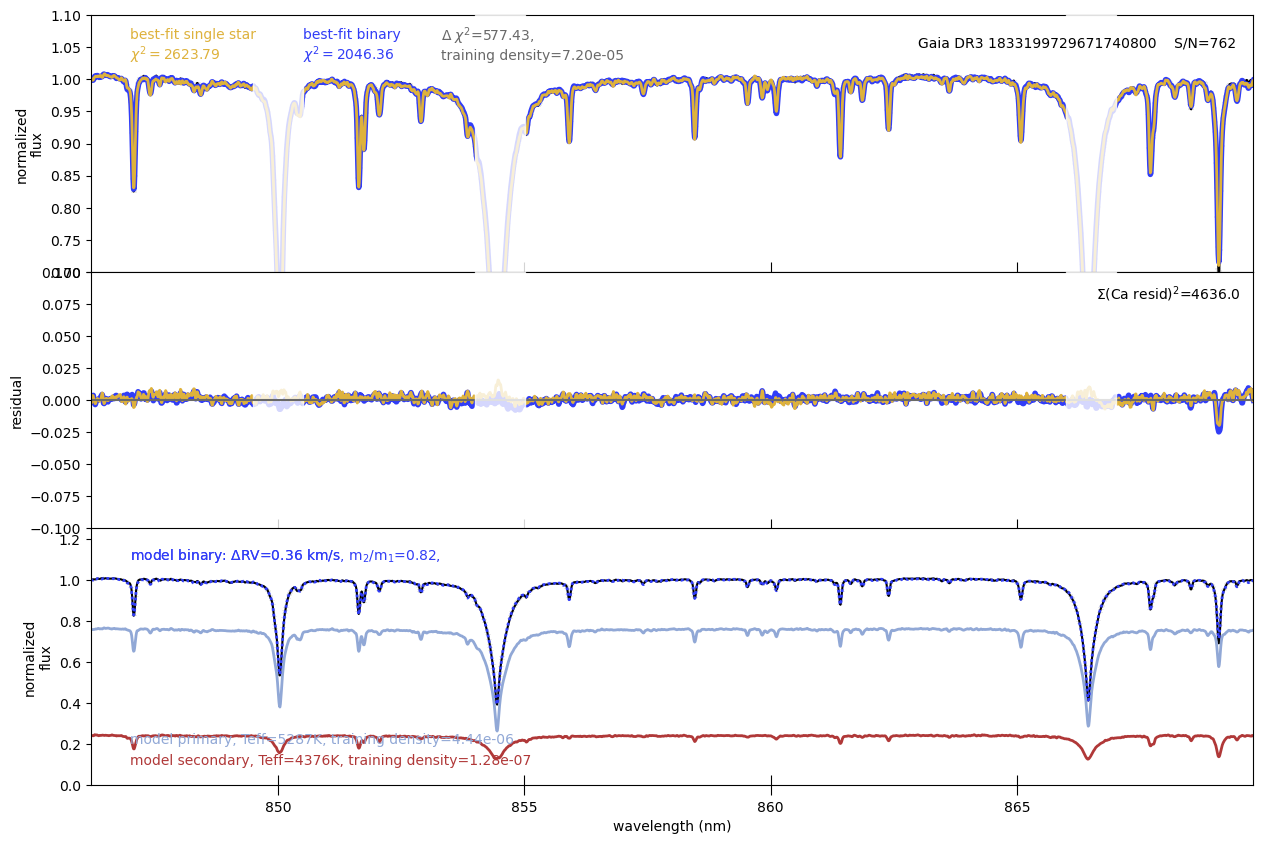

HD 202917


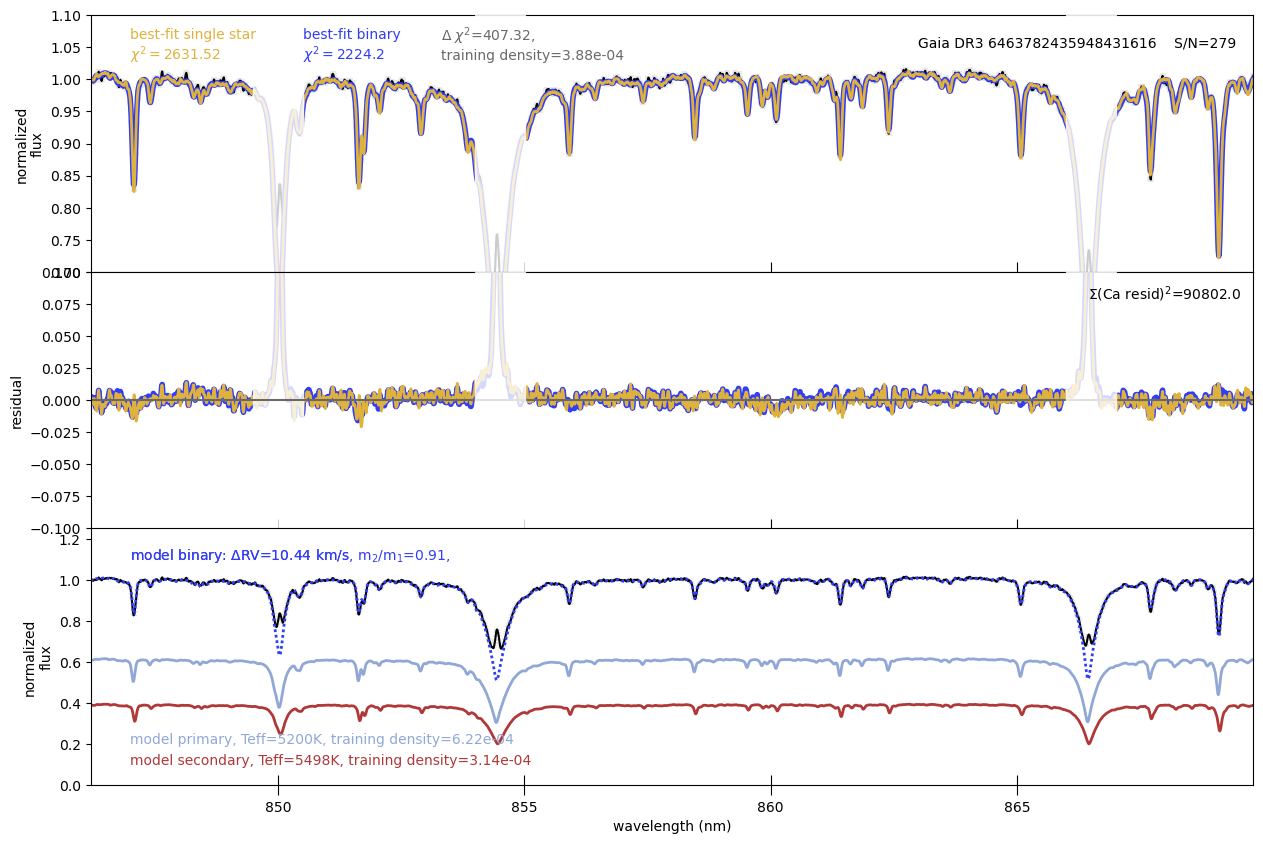

HD 82885


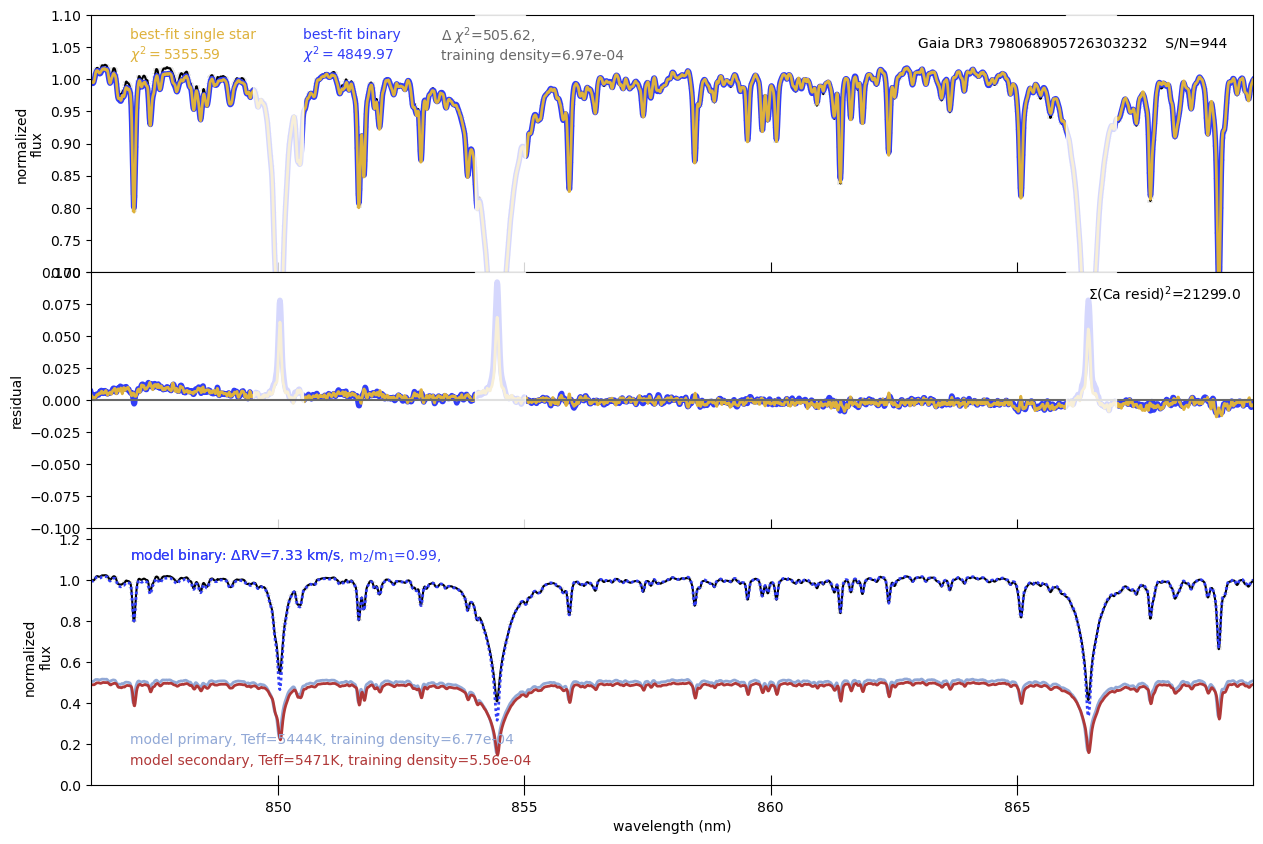

In [13]:
import gaia_spectrum as gs
spocs_flux = pd.read_csv('./data/gaia_rvs_dataframes/spocs_flux.csv')
spocs_sigma = pd.read_csv('./data/gaia_rvs_dataframes/spocs_sigma.csv')

for source_id in spocs_metrics.query('delta_chisq > 300').source_id:
    target_id = spocs_metrics[spocs_metrics.source_id==source_id].iloc[0].target_id
    print(target_id)
    gs.GaiaSpectrum(source_id, spocs_flux[str(source_id)],spocs_sigma[str(source_id)]).plot()

In [16]:
df = pd.read_csv('./data/label_dataframes/spocs_cannon_labels.csv')
df[df.source_id==231113736385994624]

,Unnamed: 0,source_id,spocs_teff,spocs_logg,spocs_feh,spocs_vbroad,rvs_spec_sig_to_noise,cannon_teff,cannon_logg,cannon_feh,cannon_alpha,cannon_vbroad
5,5,231113736385994624,5077.0,4.69,-0.99,0.6,464.392944,5193.710033,4.428207,-0.63088,0.207512,6.143578


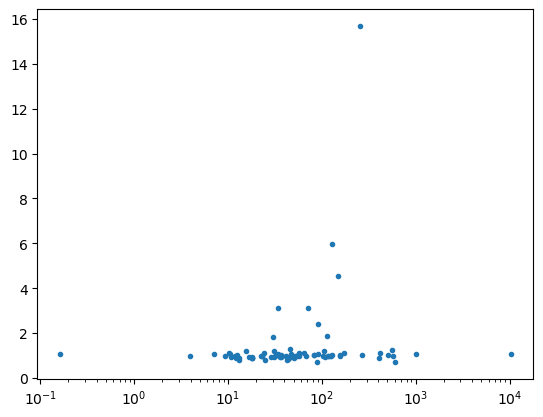

In [25]:
# great there's no correlation
df = pd.merge(spocs_metrics, spocs_labels, on='source_id')
plot(df.delta_chisq, df.ruwe, '.')
xscale('log')
